<a href="https://colab.research.google.com/github/won195/TIL/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
data = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('데이터셋 타입 : ', type(data))
print('반환된 값의 길이 : ', len(data))

데이터셋 타입 :  <class 'tuple'>
반환된 값의 길이 :  2


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


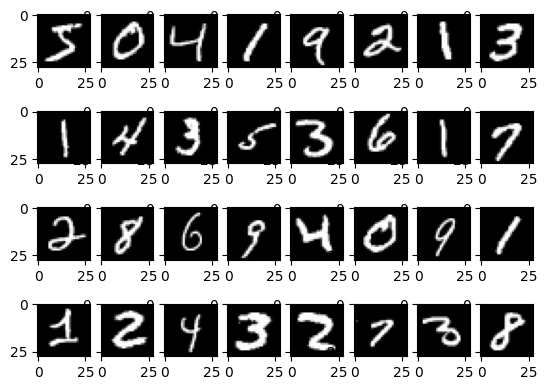

In [ ]:
import matplotlib.pyplot as plt

for i in range(0,32) :
  plt.subplot(4, 8, i+1)
  plt.imshow(X_train[i], cmap='gray')
plt.show()

In [ ]:
X_train[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [ ]:
 model.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [24]:
X_train[0].shape

(28, 28)

In [26]:
X_train = X_train.reshape((60000, 28 * 28))

X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28 * 28))

X_test = X_test.astype('float32') / 255

In [27]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [29]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2673 - accuracy: 0.9224
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1085 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0719 - accuracy: 0.9783
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0387 - accuracy: 0.9883


In [30]:
test_digits = X_test[0:10]

predictions = model.predict(test_digits)

predictions

1/1 [==============================] - 0s 86ms/step


array([[1.6140891e-08, 3.2842593e-09, 1.2154874e-06, 2.6533094e-06,
        1.0860964e-11, 1.2074052e-09, 1.0486356e-13, 9.9999589e-01,
        1.5425469e-08, 2.0725440e-07],
       [3.6110841e-08, 7.9591809e-05, 9.9972939e-01, 1.7810853e-04,
        4.3741703e-13, 2.3456765e-07, 3.2599183e-07, 4.1871107e-11,
        1.2413536e-05, 4.6193331e-12],
       [3.7631560e-07, 9.9916631e-01, 1.3202686e-04, 6.2278150e-06,
        4.6882797e-05, 3.6658566e-06, 1.3434888e-05, 4.3970882e-04,
        1.8974049e-04, 1.5203402e-06],
       [9.9970222e-01, 1.3584838e-08, 2.8986560e-05, 4.5522782e-07,
        3.7287228e-07, 7.8932132e-08, 1.0236158e-05, 2.4528295e-04,
        3.3717459e-08, 1.2356292e-05],
       [1.3582815e-06, 3.0718567e-08, 1.2161462e-05, 1.6875171e-08,
        9.9778455e-01, 5.3644019e-08, 4.4199778e-06, 4.1120808e-04,
        4.2981901e-06, 1.7820090e-03],
       [3.4812949e-08, 9.9786079e-01, 1.7788093e-06, 6.5761930e-07,
        2.1201131e-05, 1.2899883e-08, 7.1827330e-08, 2.09

In [31]:
predictions[0].argmax()

7

In [32]:
y_test[0]

7

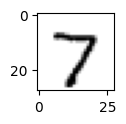

In [35]:
digit = X_test[0]
digit = digit.reshape(28, 28)
fig = plt.figure(figsize=(1, 1)) 
plt.imshow(digit, cmap=plt.cm.binary)  # cmap=plt.cm.binary : 흰색과 검은색만으로 구성하도록 함
plt.show()

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'테스트 정확도:{test_acc}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0660 - accuracy: 0.9791
테스트 정확도:0.9790999889373779


In [39]:
import numpy as np
array1 = np.array([1,2,3])
print('array1 type:', type(array1))
print('array1 array 형태:', array1.shape)

array1 type: <class 'numpy.ndarray'>
array1 array 형태: (3,)


In [43]:
array2 = np.array([[1,2,3],[2,3,4]])
print('array2 type:', type(array2))
print('array2 array shape:', array2.shape)

array2 type: <class 'numpy.ndarray'>
array2 array shape: (2, 3)


In [44]:
array3 = np.array([[[1,2,3],[2,3,4]],[[1,2,3],[2,3,4]]])
print('array3 type:', type(array3))
print('array3 array shape:', array3.shape)


array3 type: <class 'numpy.ndarray'>
array3 array shape: (2, 2, 3)
